In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.signal import find_peaks as fp
from mpmath import ellipk,log
from scipy.special import gamma as GAMMA
import os 
#from mpl_toolkits import mplot3d
from scipy.optimize import fmin_cg, fmin_tnc, curve_fit, newton, bisect, fsolve
from SourcesTBG import *
from MoreSources import *
from scipy.misc import derivative as scider
import pandas as pd
from scipy.linalg import eigh,eig,eigvalsh
from functools import partial
import seaborn as sns
from FeynmanHellman import *
from saddlefinder import *
import csv
from Decorators import *
from YuanDos import *
from DosHelper import*
TO_DEGREE = 1.0/0.018326
IN_RADIAN = np.pi/180
vFpar = 4.31074647887324
wpar=0.11
BANDS = 8

thetaset = np.load('thetaset.npy')
saddleset = np.load('saddleset.npy')
rotangs = np.load('rotangs.npy')
alphabeta = np.load('alphabeta.npy') #Note the need to multiply 0.5 to the values in the loaded alphabeta
Evs = np.load('Evs.npy')
gamma, kappa = np.load('gammakappa.npy') #No need to multiply any combinatorial factors here
BWset = np.load('BWset.npy')

ival = 5
Ev = Evs[ival]
thetai = thetaset[ival] * IN_RADIAN
rotang = rotangs[ival][0] * IN_RADIAN
alpha,beta = 0.5* alphabeta[ival]
kx0,ky0 = saddleset[ival]

In [2]:
X = np.linspace(-0.055,0.055,200)
Y = np.linspace(-0.055,0.055,200)
X,Y,Z = data_for_contours(thetai=thetaset[ival],X=X,Y=Y)

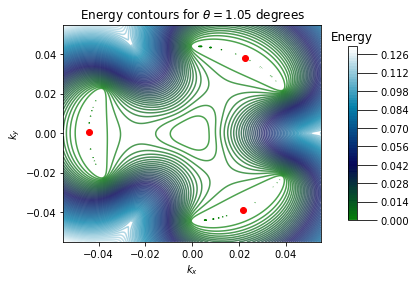

In [3]:
fig, ax = plt.subplots()
CS = ax.contour(X,Y,Z, levels = 80, alpha=0.7,cmap='ocean')
ax.scatter(kx0,ky0,c='r')
kx120,ky120 = rot2D([kx0,ky0],2*np.pi/3)
ax.scatter(kx120,ky120,c='r')
kx240,ky240 = rot2D([kx0,ky0],4*np.pi/3)
ax.scatter(kx240,ky240,c='r')
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')
ax.set_title("Energy contours for $\\theta = $" + str(int(thetaset[ival] * 100)/100) + ' degrees' )
ax.contour(X,Y,Z,[Ev],linestyles='dashed', alpha=1, cmap='ocean')
cbar = plt.colorbar(CS,shrink=0.8,pad=0.08)
cbar.ax.tick_params(size=20)
cbar.ax.set_title('Energy')
#cbar.ax.set_yticklabels(['$0.9E_v$','$E_v$','$1.1E_v$'])
cbar.lines[0].set_linewidth(8)
#plt.contour(closeX,closeY,closeZ,[Ev],alpha=0.7,cmap='ocean')
#plt.savefig('RevisedFigs/ContoursMagic.pdf')

## Zoom at the found saddle point: relevant only for magic angle 

In [4]:
closeX = np.linspace(kx0 - 0.005, kx0 + 0.005, 200)
closeY = np.linspace(ky0 - 0.005, ky0 + 0.005, 200)
closeX, closeY, closeZ = data_for_contours(thetai=thetaset[ival],X=closeX,Y=closeY)

7.156710005445224e-07 48.578087800140665 -0.0016474472495307778 -1100.5594879665343 6227.899571591622


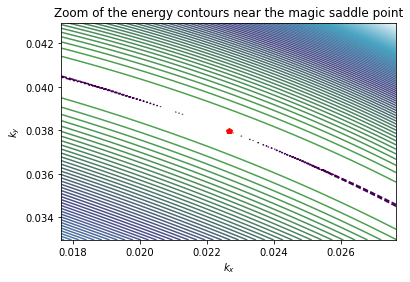

In [7]:
plt.contour(closeX,closeY,closeZ,levels=80,alpha=0.7,cmap='ocean')
plt.contour(closeX,closeY,closeZ,np.array([1*Ev,]),linestyles='dashed', alpha=1)
#plt.colorbar()
plt.plot(kx0,ky0,'rp')
plt.title('Zoom of the energy contours near the magic saddle point')
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
#plt.savefig('RevisedFigs/ZoomMagicContours.pdf')
print(Ev,alpha, beta, gamma,kappa)